In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_esi_klein = pd.read_csv('data/Spalt,Rundblende/Rund_klein_ESI.csv')
df_esi_groß = pd.read_csv('data/Spalt,Rundblende/Rund_groß_ESI.csv')
df_esi_spalt = pd.read_csv('data/Spalt,Rundblende/Spalt_ESI.csv')
df_sreels_klein = pd.read_csv('data/Spalt,Rundblende/Rund_klein_SR-EELS.csv')
df_sreels_groß = pd.read_csv('data/Spalt,Rundblende/Rund_groß_SR-EELS.csv')
df_sreels_spalt = pd.read_csv('data/Spalt,Rundblende/Spalt_SR-EELS.csv')

Die folgenden Diagramme zeigen die Daten, wie sie aus den aufgenommenen Bildern extrahiert wurden. Es werden nur die Datensätze mit geringerer Ausdehnung zentriert, um eine bessere Vergleichbarkeit zu erreichen.

Die Spaltblende ist nicht vollständig abgebildet. Durch Die Selektorblende wird sie an beiden Seiten beschnitten.

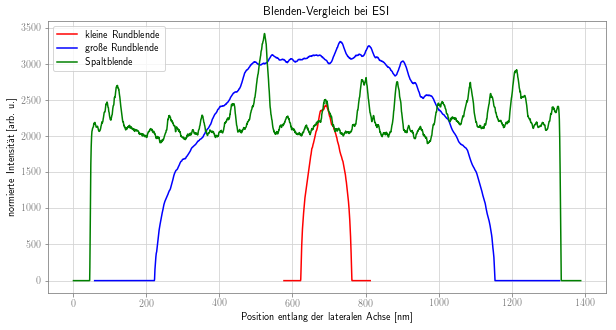

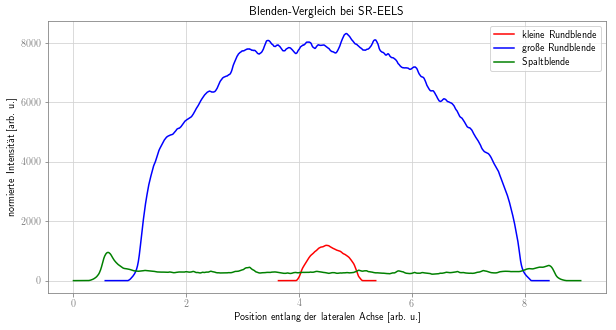

In [2]:
plt.figure(figsize=(10,5))
plt.title('Blenden-Vergleich bei ESI')
plt.plot(df_esi_klein.X + df_esi_spalt.X.max() / 2 - df_esi_klein.X.max() / 2,
         df_esi_klein.Y, c='r', label='kleine Rundblende')
plt.plot(df_esi_groß.X + df_esi_spalt.X.max() / 2 - df_esi_groß.X.max() / 2,
         df_esi_groß.Y, c='b', label='große Rundblende')
plt.plot(df_esi_spalt.X, df_esi_spalt.Y, c='g', label='Spaltblende')
plt.xlabel('Position entlang der lateralen Achse [nm]')
plt.ylabel('normierte Intensität [arb. u.]')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,5))
plt.title('Blenden-Vergleich bei SR-EELS')
plt.plot(df_sreels_klein.X + df_sreels_spalt.X.max() / 2 - df_sreels_klein.X.max() / 2,
         df_sreels_klein.Y, c='r', label='kleine Rundblende')
plt.plot(df_sreels_groß.X + df_sreels_spalt.X.max() / 2 - df_sreels_groß.X.max() / 2,
         df_sreels_groß.Y, c='b', label='große Rundblende')
plt.plot(df_sreels_spalt.X, df_sreels_spalt.Y, c='g', label='Spaltblende')
plt.xlabel('Position entlang der lateralen Achse [arb. u.]')
plt.ylabel('normierte Intensität [arb. u.]')
plt.legend(loc='best')
plt.show()

In [3]:
def scale(df):
    threshold = df.Y.max() / 250
    x_start = 0
    while df.Y[x_start] < threshold:
        x_start += 1
    x_stop = x_start + 1
    while df.Y[x_stop] > threshold:
        x_stop += 1
    #print(x_start, x_stop)
    df_out = df.loc[x_start:x_stop].copy()
    df_out.X -= df.X[x_start]
    df_out.X /= df_out.X.max()
    #print(len(df), len(df_out))
    df_out.Y /= df_out.Y.mean()
    return df_out

df_esi_klein_s = scale(df_esi_klein)
df_esi_groß_s = scale(df_esi_groß)
df_esi_spalt_s = scale(df_esi_spalt)
df_sreels_klein_s = scale(df_sreels_klein)
df_sreels_groß_s = scale(df_sreels_groß)
df_sreels_spalt_s = scale(df_sreels_spalt)

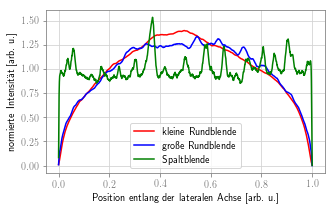

In [4]:
plt.figure(figsize=(5, 3))
plt.plot(df_esi_klein_s.X, df_esi_klein_s.Y, c='r', label='kleine Rundblende')
plt.plot(df_esi_groß_s.X, df_esi_groß_s.Y, c='b', label='große Rundblende')
plt.plot(df_esi_spalt_s.X, df_esi_spalt_s.Y, c='g', label='Spaltblende')
plt.xlabel('Position entlang der lateralen Achse [arb. u.]')
plt.ylabel('normierte Intensität [arb. u.]')
plt.legend(loc='lower center')
plt.savefig('Bilder/Blenden_Vergleich_ESI')
plt.show()

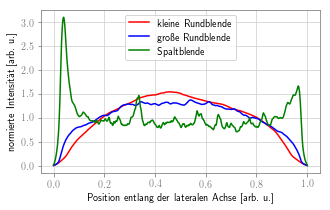

In [5]:
plt.figure(figsize=(5, 3))
plt.plot(df_sreels_klein_s.X, df_sreels_klein_s.Y, c='r', label='kleine Rundblende')
plt.plot(df_sreels_groß_s.X, df_sreels_groß_s.Y, c='b', label='große Rundblende')
plt.plot(df_sreels_spalt_s.X, df_sreels_spalt_s.Y, c='g', label='Spaltblende')
plt.xlabel('Position entlang der lateralen Achse [arb. u.]')
plt.ylabel('normierte Intensität [arb. u.]')
plt.legend(loc='upper center')
plt.savefig('Bilder/Blenden_Vergleich_SR-EELS')
plt.show()